**Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

**Data Loading**

In [2]:
data = pd.read_csv("/kaggle/input/movies/movies.csv")

In [3]:
data.shape

(4803, 24)

In [4]:
data.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 4803 non-null   int64  
 1   budget                4803 non-null   int64  
 2   genres                4775 non-null   object 
 3   homepage              1712 non-null   object 
 4   id                    4803 non-null   int64  
 5   keywords              4391 non-null   object 
 6   original_language     4803 non-null   object 
 7   original_title        4803 non-null   object 
 8   overview              4800 non-null   object 
 9   popularity            4803 non-null   float64
 10  production_companies  4803 non-null   object 
 11  production_countries  4803 non-null   object 
 12  release_date          4802 non-null   object 
 13  revenue               4803 non-null   int64  
 14  runtime               4801 non-null   float64
 15  spoken_languages     

**filter the required columns for recommendation**
- It's just that you choose the information (features) that you can use to recommend similar movies.

In [6]:
required_col = ['genres', 'keywords', 'overview', 'title']
data = data[required_col]

In [7]:
data.head()

,genres,keywords,overview,title
0,Action Adventure Fantasy Science Fiction,culture clash future space war space colony so...,"In the 22nd century, a paraplegic Marine is di...",Avatar
1,Adventure Fantasy Action,ocean drug abuse exotic island east india trad...,"Captain Barbossa, long believed to be dead, ha...",Pirates of the Caribbean: At World's End
2,Action Adventure Crime,spy based on novel secret agent sequel mi6,A cryptic message from Bond’s past sends him o...,Spectre
3,Action Crime Drama Thriller,dc comics crime fighter terrorist secret ident...,Following the death of District Attorney Harve...,The Dark Knight Rises
4,Action Adventure Science Fiction,based on novel mars medallion space travel pri...,"John Carter is a war-weary, former military ca...",John Carter


**check for missing values**

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   genres    4775 non-null   object
 1   keywords  4391 non-null   object
 2   overview  4800 non-null   object
 3   title     4803 non-null   object
dtypes: object(4)
memory usage: 150.2+ KB


In [9]:
data = data.dropna().reset_index(drop=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4387 entries, 0 to 4386
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   genres    4387 non-null   object
 1   keywords  4387 non-null   object
 2   overview  4387 non-null   object
 3   title     4387 non-null   object
dtypes: object(4)
memory usage: 137.2+ KB


**Create a unified script for each movie**
- So that we can work on it as an input for vectorization (like TF-IDF)
- Then we calculate the cosine similarity to know which movies have similar content.

In [11]:
data['combined'] = data['genres'] + ' ' + data['keywords'] + ' ' + data['overview']

In [12]:
data.head()

,genres,keywords,overview,title,combined
0,Action Adventure Fantasy Science Fiction,culture clash future space war space colony so...,"In the 22nd century, a paraplegic Marine is di...",Avatar,Action Adventure Fantasy Science Fiction cultu...
1,Adventure Fantasy Action,ocean drug abuse exotic island east india trad...,"Captain Barbossa, long believed to be dead, ha...",Pirates of the Caribbean: At World's End,Adventure Fantasy Action ocean drug abuse exot...
2,Action Adventure Crime,spy based on novel secret agent sequel mi6,A cryptic message from Bond’s past sends him o...,Spectre,Action Adventure Crime spy based on novel secr...
3,Action Crime Drama Thriller,dc comics crime fighter terrorist secret ident...,Following the death of District Attorney Harve...,The Dark Knight Rises,Action Crime Drama Thriller dc comics crime fi...
4,Action Adventure Science Fiction,based on novel mars medallion space travel pri...,"John Carter is a war-weary, former military ca...",John Carter,Action Adventure Science Fiction based on nove...


We'll use 'title' next to:

- Know the name of the movie the user selected.
- Show them the names of similar movies based on the 'combined' keywords.

In [13]:
df = data[['title', 'combined']]

In [14]:
df.head()

,title,combined
0,Avatar,Action Adventure Fantasy Science Fiction cultu...
1,Pirates of the Caribbean: At World's End,Adventure Fantasy Action ocean drug abuse exot...
2,Spectre,Action Adventure Crime spy based on novel secr...
3,The Dark Knight Rises,Action Crime Drama Thriller dc comics crime fi...
4,John Carter,Action Adventure Science Fiction based on nove...


**visualization of frequently occurring words**

In [15]:
combined_text = " ".join(df['combined'])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(combined_text)

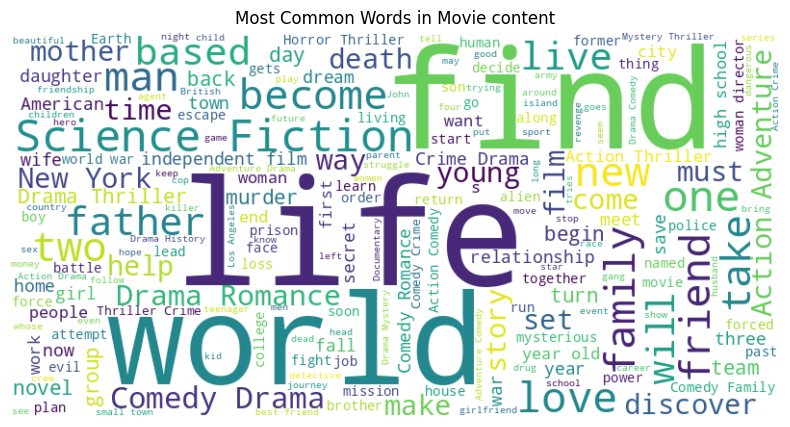

In [16]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Words in Movie content")
plt.show()

In [17]:
nltk.download('punkt') #model used to divide text into sentences or words (tokenization).
nltk.download('stopwords') 

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

**Text preprocessing**

In [18]:
stop_words = set(stopwords.words('english'))

In [19]:
def preprocess_text(text):
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    text = text.lower()
    token = word_tokenize(text)
    token = [word for word in token if word not in stop_words]
    return "".join(token)

In [20]:
df['cleaned_text'] = data['combined'].apply(preprocess_text)

/tmp/ipykernel_13/102832593.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaned_text'] = data['combined'].apply(preprocess_text)


In [21]:
df.head()

,title,combined,cleaned_text
0,Avatar,Action Adventure Fantasy Science Fiction cultu...,actionadventurefantasysciencefictionculturecla...
1,Pirates of the Caribbean: At World's End,Adventure Fantasy Action ocean drug abuse exot...,adventurefantasyactionoceandrugabuseexoticisla...
2,Spectre,Action Adventure Crime spy based on novel secr...,actionadventurecrimespybasednovelsecretagentse...
3,The Dark Knight Rises,Action Crime Drama Thriller dc comics crime fi...,actioncrimedramathrillerdccomicscrimefighterte...
4,John Carter,Action Adventure Science Fiction based on nove...,actionadventuresciencefictionbasednovelmarsmed...


In [22]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['cleaned_text'])

**Compute Cosine Similarity**
- It calculates the similarity between each pair of movies based on their numerical representation.

In [23]:
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [24]:
print(cosine_sim[1])

[0. 1. 0. ... 0. 0. 0.]


**Recommendation Function**

In [25]:
def recommend_movies(movie_name, cosine_sim=cosine_sim, df=df, top_n=5):
    # Find the index of the movie
    idx = df[df['title'].str.lower() == movie_name.lower()].index
    if len(idx) == 0:
        return "Movie not found in the dataset!"
    idx = idx[0]

    # Get similarity scores
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]

    # Get movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return top n similar movies
    return df[['title']].iloc[movie_indices]
     

In [26]:
row_index = df[df['title'] == "Batman v Superman: Dawn of Justice"].index
print(row_index)

Index([9], dtype='int64')


In [27]:
movie_name = data["title"][9]
print(movie_name)

Batman v Superman: Dawn of Justice


In [28]:
print(f"Recommendations for the Movie {movie_name}")
recommendations = recommend_movies(movie_name)
print(recommendations)

Recommendations for the Movie Batman v Superman: Dawn of Justice
                                      title
0                                    Avatar
1  Pirates of the Caribbean: At World's End
2                                   Spectre
3                     The Dark Knight Rises
4                               John Carter
